# Electric Vehicles Market Size Analysis

In [2]:
# 1. Kurulum ve Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# 2. Veri Setini Yükleme
file_path = 'Electric_Vehicle_Population_Data.csv'
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [7]:
# 3. Veri Temizleme
df.info()
df.isnull().sum()

drop_cols = ['VIN (1-10)', 'DOL Vehicle ID']
df = df.drop(columns=drop_cols, errors='ignore')

if 'Model Year' in df.columns:
    df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

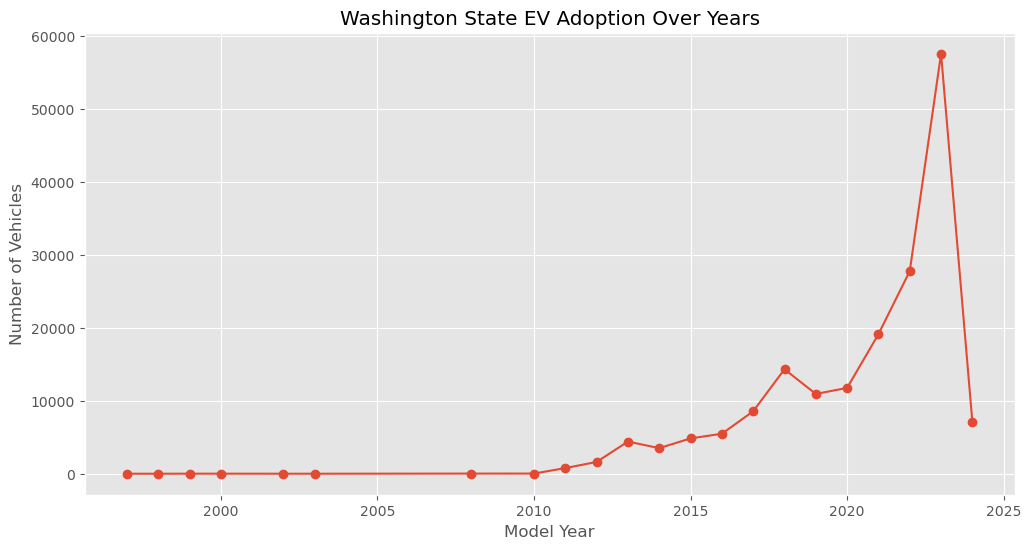

In [8]:
# 4. EV Adoption Trend - “Elektrikli araçların toplum tarafından benimsenme / yaygınlaşma eğilimi”
ev_trend = df.groupby('Model Year').size().reset_index(name='Count')

plt.plot(ev_trend['Model Year'], ev_trend['Count'], marker='o')
plt.title('Washington State EV Adoption Over Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.show()

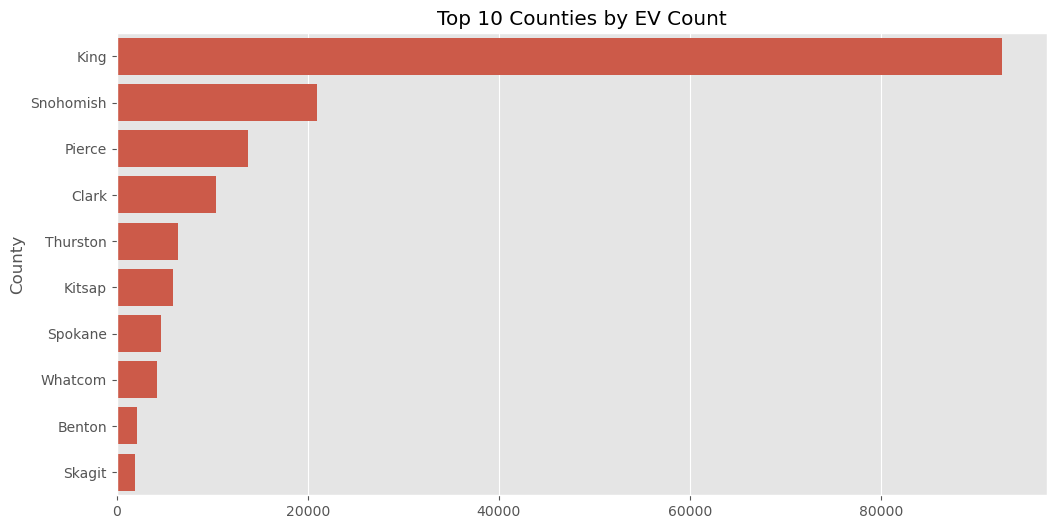

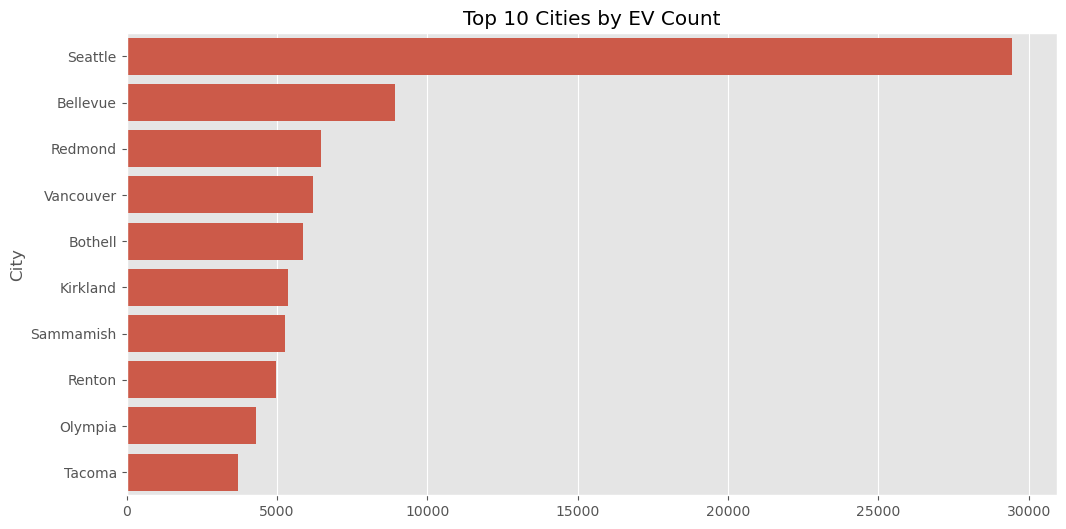

In [9]:
# 5. Coğrafi Dağılım
county_dist = df['County'].value_counts().head(10)
sns.barplot(x=county_dist.values, y=county_dist.index)
plt.title('Top 10 Counties by EV Count')
plt.show()

city_dist = df['City'].value_counts().head(10)
sns.barplot(x=city_dist.values, y=city_dist.index)
plt.title('Top 10 Cities by EV Count')
plt.show()

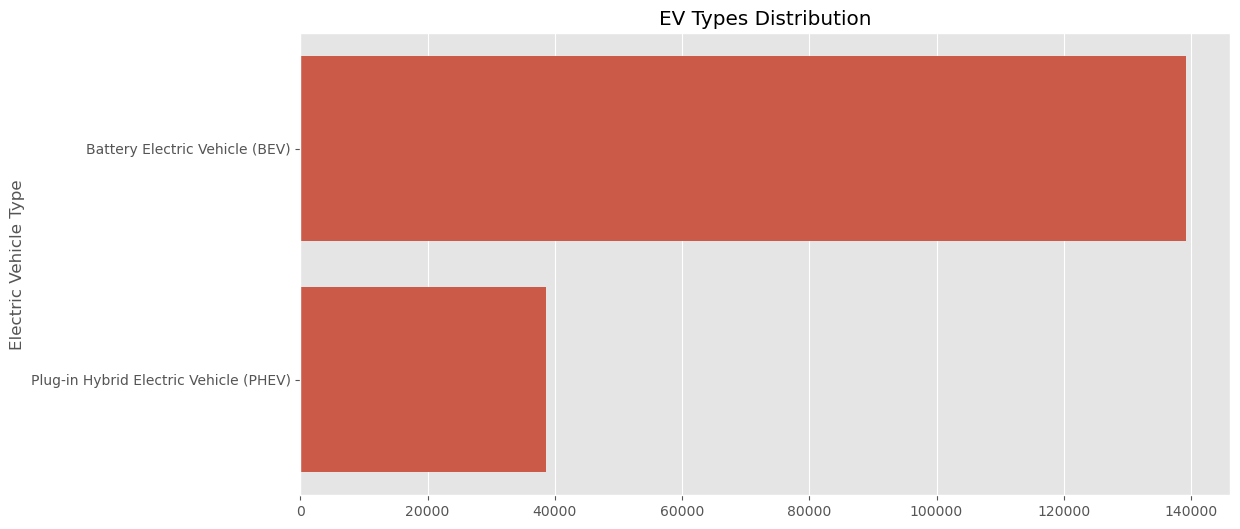

In [10]:
# 6. Elektrikli Araç Tipleri Dağılımı
ev_type = df['Electric Vehicle Type'].value_counts()
sns.barplot(x=ev_type.values, y=ev_type.index)
plt.title('EV Types Distribution')
plt.show()

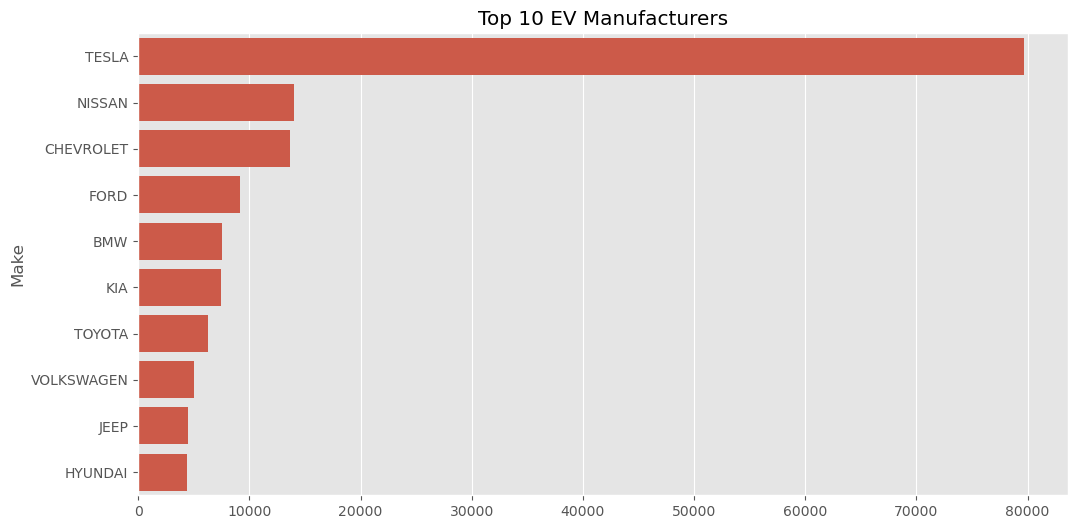

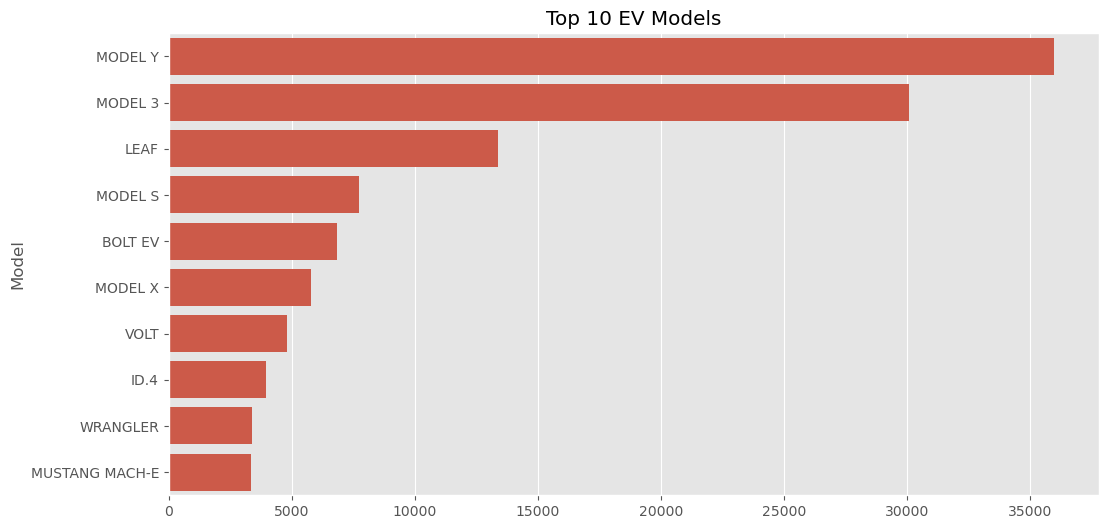

In [11]:
# 7. Marka & Model Analizi
make_dist = df['Make'].value_counts().head(10)
sns.barplot(x=make_dist.values, y=make_dist.index)
plt.title('Top 10 EV Manufacturers')
plt.show()

model_dist = df['Model'].value_counts().head(10)
sns.barplot(x=model_dist.values, y=model_dist.index)
plt.title('Top 10 EV Models')
plt.show()

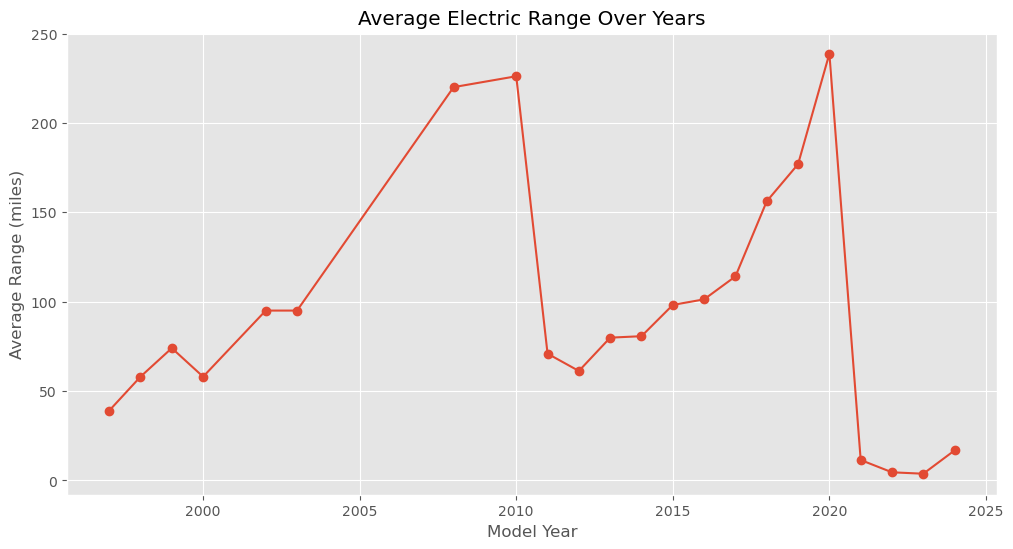

In [12]:
# 8. Menzil Analizi
if 'Electric Range' in df.columns:
    range_trend = df.groupby('Model Year')['Electric Range'].mean().reset_index()
    plt.plot(range_trend['Model Year'], range_trend['Electric Range'], marker='o')
    plt.title('Average Electric Range Over Years')
    plt.xlabel('Model Year')
    plt.ylabel('Average Range (miles)')
    plt.show()

CAGR (1997-2024): 38.87%


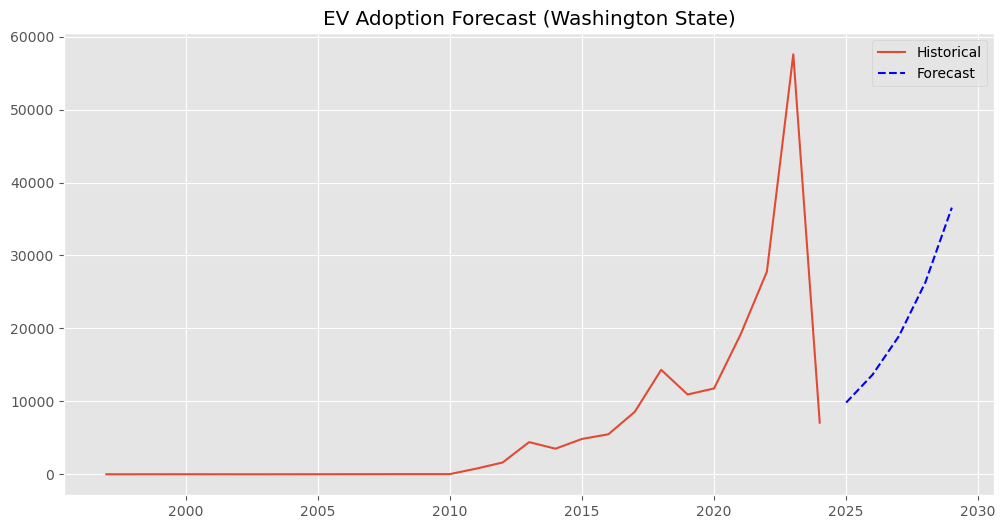

In [13]:
# 9. CAGR ve Forecast - CAGR (Compound Annual Growth Rate: Bileşik Yıllık Büyüme Oranı)
# Bir değerin (örneğin Elektrikli araç sayısı) belli bir zaman aralığında her yıl ortalama yüzde kaç büyüdüğünü gösterir. 
# Tek yıllık artışları değil, tüm dönemi kapsayan ortalama yıllık büyümeyi verir.

start_year = df['Model Year'].min()
end_year = df['Model Year'].max()
start_value = df[df['Model Year'] == start_year].shape[0]
end_value = df[df['Model Year'] == end_year].shape[0]

cagr = ((end_value / start_value) ** (1/(end_year-start_year)) - 1) * 100
print(f'CAGR ({start_year}-{end_year}): {cagr:.2f}%')

years = np.arange(end_year+1, 2030)
forecast = [end_value * ((1+cagr/100) ** (i)) for i in range(1, len(years)+1)]

plt.plot(ev_trend['Model Year'], ev_trend['Count'], label='Historical')
plt.plot(years, forecast, linestyle='--', label='Forecast', color='blue')
plt.title('EV Adoption Forecast (Washington State)')
plt.legend()
plt.show()

CONCLUSION:

- According to the results from the data set, the number of electric vehicles in Washington state has shown rapid growth over the years.  
- The highest concentration of electric vehicles is in King County and the Seattle area.  
- Tesla dominates a large portion of the market.  
- Average range has increased over the years (especially after 2020).
- Based on the CAGR rate, a significant increase in the number of electric vehicles is projected by 2029.  

SONUÇ:

- Data setinden çıkan sonuca göre Washington eyaletinde elektrikli araç sayısı yıllar içinde hızlı bir artış göstermektedir.  
- En fazla elektrikli araç King County ve Seattle civarında yoğunlaşmıştır.  
- Pazarın büyük kısmını Tesla domine etmektedir.  
- Ortalama menzil yıllar geçtikçe artmaktadır (özellikle 2020 sonrası).
- CAGR oranına göre 2029’a kadar elektrikli araç sayısında ciddi bir büyüme öngörülmektedir.